In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from datetime import date, time, datetime, timedelta
from IPython.display import clear_output
import scipy.stats
from statistics import mode

In [2]:
laptop = 'work'

if laptop == 'home':
    growth_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/growth_db.csv"
    weather_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/weather_db.csv"
    zone_data_path = "C:/Users/tmccl/OneDrive/Documents/GitHub/AFL-Leek-Growth-Model/zone_db.csv"
    
if laptop == 'work':
    growth_data_path = "F:\\Farm Data\Growth Model\growth_db.csv"
    weather_data_path = "F:\\Farm Data\Growth Model\weather_db.csv"
    zone_data_path = "F:\\Farm Data\Growth Model\\zone_db.csv"
    
growth_data = pd.read_csv(growth_data_path)
weather_data = pd.read_csv(weather_data_path)
zone_data = pd.read_csv(zone_data_path)

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d/%m/%Y')
weather_data['time'] = pd.to_datetime(weather_data['time'], format='%H:%M:%S')
weather_data['day'] = weather_data.date.dt.day
weather_data['month'] = weather_data.date.dt.month
weather_data['day_month'] = weather_data['day'].astype(str) + " - " + weather_data['month'].astype(str)

min_grow_temp = 5

weather_data['heat_units'] = weather_data['avg_temp'] - min_grow_temp
weather_data['heat_units'] = np.where((weather_data['heat_units'] < 0), 0, weather_data['heat_units']/24)

In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62569 entries, 0 to 62568
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             62569 non-null  datetime64[ns]
 1   time             62569 non-null  datetime64[ns]
 2   avg_temp         62569 non-null  float64       
 3   rh               62569 non-null  float64       
 4   rain             62569 non-null  float64       
 5   solar_radiation  62569 non-null  int64         
 6   wind_speed       60962 non-null  float64       
 7   bat_volt         60962 non-null  float64       
 8   leaf_wet         60962 non-null  float64       
 9   dew_point        60962 non-null  float64       
 10  day              62569 non-null  int64         
 11  month            62569 non-null  int64         
 12  day_month        62569 non-null  object        
 13  heat_units       62569 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int6

In [6]:
weather_data.head()

,date,time,avg_temp,rh,rain,solar_radiation,wind_speed,bat_volt,leaf_wet,dew_point,day,month,day_month,heat_units
0,2014-05-14,1900-01-01 14:00:00,16.2,55.9,0.0,205,2.7,6904.0,0.0,7.2,14,5,14 - 5,0.466667
1,2014-05-14,1900-01-01 15:00:00,17.4,51.2,0.0,544,2.2,6952.0,0.0,7.0,14,5,14 - 5,0.516667
2,2014-05-14,1900-01-01 16:00:00,17.7,48.9,0.0,387,2.1,6922.0,0.0,6.6,14,5,14 - 5,0.529167
3,2014-05-14,1900-01-01 17:00:00,17.9,48.9,0.0,274,2.0,6904.0,0.0,6.7,14,5,14 - 5,0.537500
4,2014-05-14,1900-01-01 18:00:00,17.2,51.0,0.0,104,1.7,6894.0,0.0,6.7,14,5,14 - 5,0.508333


In [7]:
growth_data['sample_date'] = pd.to_datetime(growth_data['sample_date'], format='%d/%m/%Y')
growth_data['fieldzone'] = growth_data["field"] + growth_data["zone"].astype(str)

stripping_coef = 0.92

growth_data['stripped_diameter'] = growth_data['diameter'] * stripping_coef

summary_data = growth_data

In [8]:
growth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82770 entries, 0 to 82769
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sample_date        82770 non-null  datetime64[ns]
 1   field              82770 non-null  object        
 2   zone               82770 non-null  int64         
 3   diameter           82770 non-null  float64       
 4   fieldzone          82770 non-null  object        
 5   stripped_diameter  82770 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.8+ MB


In [9]:
growth_data.head()

,sample_date,field,zone,diameter,fieldzone,stripped_diameter
0,2019-07-17,Allans 18,1,4.0,Allans 181,3.68
1,2019-07-17,Allans 18,1,3.0,Allans 181,2.76
2,2019-07-17,Allans 18,1,5.0,Allans 181,4.60
3,2019-07-17,Allans 18,1,5.0,Allans 181,4.60
4,2019-07-17,Allans 18,1,3.0,Allans 181,2.76


In [10]:
zone_data['planting_date'] = pd.to_datetime(zone_data['planting_date'], format='%d/%m/%Y')
zone_data['est_harvest_date'] = pd.to_datetime(zone_data['est_harvest_date'], format='%d/%m/%Y')
zone_data["zone"] = zone_data["zone"].astype(str)
zone_data["fieldzone"] = zone_data["field"] + zone_data["zone"]

In [11]:
zone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   field             631 non-null    object        
 1   zone              631 non-null    object        
 2   planting_date     631 non-null    datetime64[ns]
 3   variety           631 non-null    object        
 4   method            631 non-null    object        
 5   inputs            631 non-null    object        
 6   protection        631 non-null    object        
 7   planting_rate     631 non-null    int64         
 8   sand              631 non-null    int64         
 9   silt              631 non-null    int64         
 10  clay              631 non-null    int64         
 11  organic_matter    631 non-null    float64       
 12  est_harvest_date  631 non-null    datetime64[ns]
 13  fieldzone         631 non-null    object        
dtypes: datetime64[ns](2), floa

In [12]:
zone_data.head()

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,fieldzone
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 071
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 072
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 073
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 074
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,2019-12-15,Allans 075


In [13]:
summary_data["zone"] = summary_data["zone"].astype(str)
summary_data["fieldzone"] = summary_data["field"] + summary_data["zone"]
summary_data['fieldzonedate'] = summary_data['fieldzone'] + summary_data['sample_date'].astype(str)

summary_data = summary_data.set_index('fieldzone').join(zone_data.set_index('fieldzone'), rsuffix = '_join')

summary_data['heat_units'] = 0
summary_data['solar_radiation'] = 0

In [14]:
summary_data = summary_data.reset_index(inplace=False)
summary_data = summary_data.drop(columns=['field_join', 'zone_join'], inplace=False)

In [15]:
def cum_heat_units(start, finish, weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['heat_units']]
    total_hu = df['heat_units'].sum()
    return total_hu

def cum_solar_radiation(start, finish, weather_data = weather_data):
    df = weather_data.loc[(weather_data['date'] > start) & (weather_data['date'] < finish), ['solar_radiation']]
    total_sr = df['solar_radiation'].sum()
    return total_sr

In [16]:
summary_data.head()

,fieldzone,sample_date,field,zone,diameter,stripped_diameter,fieldzonedate,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,heat_units,solar_radiation
0,Allans 071,2019-07-18,Allans 07,1,3.0,2.76,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,0,0
1,Allans 071,2019-07-18,Allans 07,1,9.0,8.28,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,0,0
2,Allans 071,2019-07-18,Allans 07,1,9.0,8.28,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,0,0
3,Allans 071,2019-07-18,Allans 07,1,8.0,7.36,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,0,0
4,Allans 071,2019-07-18,Allans 07,1,12.0,11.04,Allans 0712019-07-18,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,0,0


In [17]:
summary_data_avg = summary_data.groupby(['fieldzonedate']).agg({'stripped_diameter' : ['mean', 'std', 'count'],
                                                                'method' : ['first'],
                                                                'inputs' : ['first'],
                                                                'variety' : ['first'],
                                                                'protection' : ['first'],
                                                                'sand' : ['mean'],
                                                                'silt' : ['mean'],
                                                                'clay' : ['mean'],
                                                                'organic_matter' : ['mean'],
                                                                'planting_date' : ['first'],
                                                                'sample_date' : ['first'],
                                                                'fieldzone' : ['first']}).reset_index()

summary_data_avg.columns = ['fieldzonedate',
                            'mean_diameter',
                            'std_dev_diameter',
                            'pp2m2', 
                            'method',
                            'inputs',
                            'variety',
                            'protection',
                            'sand',
                            'silt',
                            'clay',
                            'organic_matter',
                            'planting_date',
                            'sample_date',
                            'fieldzone']

summary_data_avg['d_lin'] = (summary_data_avg['mean_diameter'])**0.625
summary_data_avg['s_lin'] = (summary_data_avg['std_dev_diameter'])**0.625
summary_data_avg['heat_units'] = 0
summary_data_avg['solar_radiation'] = 0

summary_data_avg.head()

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,protection,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,s_lin,heat_units,solar_radiation
0,Allans 0712019-07-18,6.685333,3.116170,45,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 071,3.278702,2.034760,0,0
1,Allans 0712019-08-29,19.020000,5.396129,46,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-08-29,Allans 071,6.302409,2.867817,0,0
2,Allans 0712019-10-29,35.047619,7.373478,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-10-29,Allans 071,9.234461,3.485742,0,0
3,Allans 0712020-01-13,35.220667,10.502927,42,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2020-01-13,Allans 071,9.262932,4.348295,0,0
4,Allans 0722019-07-18,6.537872,2.610864,47,Drilled,Conventional,Krypton,Barley,39,37,24,29.6,2019-04-01,2019-07-18,Allans 072,3.233313,1.821756,0,0


In [18]:
weather_data_avg = weather_data.groupby(['date']).agg({'rain' : ['sum'],
                                                       'heat_units' : ['sum'],
                                                       'solar_radiation' : ['sum'],
                                                       'wind_speed' : ['mean'],
                                                       'rh' : ['mean'],
                                                       'avg_temp' : ['mean']}).reset_index()

weather_data_avg.columns = ['date',
                            'rain',
                            'heat_units',
                            'solar_radiation',
                            'wind_speed',
                            'rh',
                            'avg_temp']

weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

weather_data_avg_group = weather_data_avg.groupby(['day_month']).agg({'rain' : ['mean'],
                                                                      'heat_units' : ['mean'],
                                                                      'solar_radiation' : ['mean'],
                                                                      'wind_speed' : ['mean'],
                                                                      'rh' : ['mean'],
                                                                      'avg_temp' : ['mean']}).reset_index()
weather_data_avg_group.columns = ['day_month',
                                  'rain',
                                  'heat_units',
                                  'solar_radiation',
                                  'wind_speed',
                                  'rh',
                                  'avg_temp']

max_date = max(weather_data_avg.date)

for i in range(1, 500):
    
    clear_output(wait=True)
    
    date = max_date + timedelta(days=i)
    weather_data_avg = weather_data_avg.append({'date': date,
                                                'rain': np.nan,
                                                'heat_units':np.nan,
                                                'solar_radiation':np.nan,
                                                'wind_speed':np.nan,
                                                'rh':np.nan,
                                                'avg_temp':np.nan }, ignore_index=True)
    
    print("Current Progress:", np.round(i/500*100,0),"%")
    
weather_data_avg['day'] = weather_data_avg.date.dt.day
weather_data_avg['month'] = weather_data_avg.date.dt.month
weather_data_avg['day_month'] = weather_data_avg['day'].astype(str) + " - " + weather_data_avg['month'].astype(str)  

Current Progress: 100.0 %


In [19]:
def mean_weather(day_month, variable):
    
    df = weather_data_avg_group[weather_data_avg_group['day_month']==day_month]
    weather_value = df[variable].sum()
    return weather_value

for variable in ['rain', 'heat_units', 'solar_radiation', 'wind_speed', 'rh', 'avg_temp']:
    for i in weather_data_avg.index:
        clear_output(wait=True)
        if weather_data_avg[variable][i] == np.nan:
            test = 'test'
        else:
            day_month = weather_data_avg['day_month'][i]
            weather_data_avg[variable][i] = mean_weather(day_month, variable)
        print(f"{variable} progress:", np.round(i/len(weather_data_avg)*100,0),"%")
    
weather_data_avg

avg_temp progress: 100.0 %


,date,rain,heat_units,solar_radiation,wind_speed,rh,avg_temp,day,month,day_month
0,2014-05-14,0.850000,5.188438,4179.625,2.404643,76.230260,10.648333,14,5,14 - 5
1,2014-05-15,0.925000,6.598490,5097.0,1.966667,80.597656,11.227656,15,5,15 - 5
2,2014-05-16,0.875000,7.736615,4556.625,2.775595,78.717031,12.701198,16,5,16 - 5
3,2014-05-17,4.300000,7.592760,4437.625,2.184524,82.265312,12.500052,17,5,17 - 5
4,2014-05-18,3.450000,7.662188,4563.125,2.020833,83.085677,12.606198,18,5,18 - 5
5,2014-05-19,1.475000,8.228281,4805.25,2.201190,81.854375,13.198594,19,5,19 - 5
6,2014-05-20,0.600000,8.866406,4785.75,2.298214,82.596458,13.843490,20,5,20 - 5
7,2014-05-21,0.550000,9.364375,4921.0,2.164881,78.458073,14.348229,21,5,21 - 5
8,2014-05-22,1.250000,9.168229,4983.375,2.607738,79.024844,14.144792,22,5,22 - 5
9,2014-05-23,0.350000,8.352656,4953.625,2.812500,80.208333,13.347292,23,5,23 - 5


In [20]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['heat_units'][i] = cum_heat_units(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


In [21]:
for i in summary_data_avg.index:
    clear_output(wait=True)
    planting_date = summary_data_avg['planting_date'][i]
    sample_date = summary_data_avg['sample_date'][i]
    summary_data_avg['solar_radiation'][i] = cum_solar_radiation(planting_date, sample_date, weather_data_avg)
    print("Current Progress:", np.round(i/len(summary_data_avg)*100,0),"%")

Current Progress: 100.0 %


<AxesSubplot:xlabel='s_lin', ylabel='solar_radiation'>

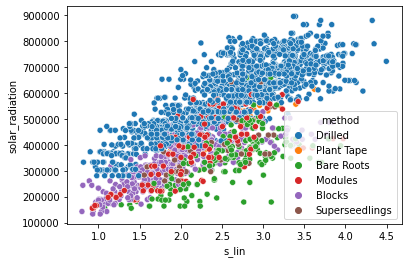

In [22]:
sns.scatterplot(data = summary_data_avg, x = 's_lin', y = 'solar_radiation', hue = 'method')

In [23]:
summary_data_avg = pd.get_dummies(summary_data_avg, columns = ['protection'], drop_first = True)

In [24]:
X = summary_data_avg.drop(['d_lin',
                           'mean_diameter',
                           'std_dev_diameter',
                           'fieldzonedate',
                           'sample_date',
                           'planting_date',
                           'sand',
                           'silt',
                           'clay',
                           'fieldzone'], axis = 1)

y = summary_data_avg['d_lin']

In [25]:
X = pd.get_dummies(X, columns = ['method',
                                 'inputs',
                                 'variety'], drop_first = True)

In [26]:
summary_data_avg.loc[(summary_data_avg.solar_radiation == 0)]

,fieldzonedate,mean_diameter,std_dev_diameter,pp2m2,method,inputs,variety,sand,silt,clay,organic_matter,planting_date,sample_date,fieldzone,d_lin,s_lin,heat_units,solar_radiation,protection_Fleece,protection_None,protection_Poly


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()

X_scaled = X

#scaler.fit_transform(X)

reg = LinearRegression().fit(X_scaled, y)
preds = reg.predict(X_scaled)
summary_data_avg['preds'] = preds
reg.score(X_scaled, y)

0.9049442892170705

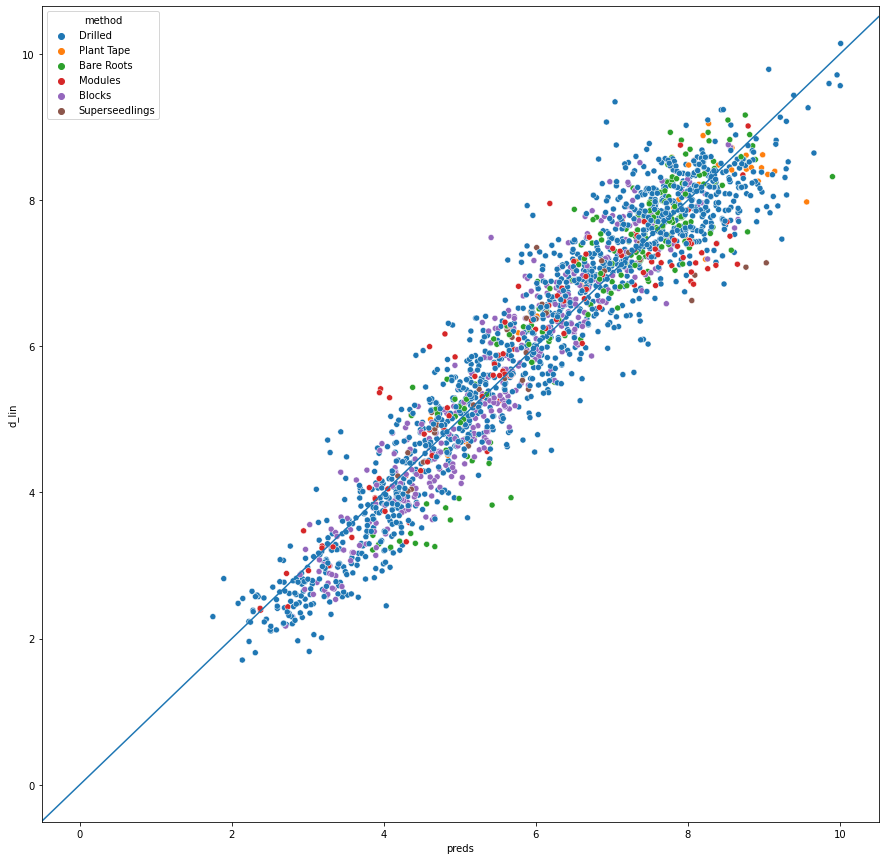

In [28]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'd_lin', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()


In [29]:
coef_list = list(reg.coef_)
var_list = list(X)

reg_coef_df = pd.DataFrame({'variable': var_list,
                            'coef': coef_list}, columns=['variable',
                                                         'coef'])

reg_coef_df

,variable,coef
0,pp2m2,0.001296
1,organic_matter,0.016345
2,s_lin,0.740649
3,heat_units,0.000796
4,solar_radiation,0.000008
5,protection_Fleece,0.535124
6,protection_None,0.173368
7,protection_Poly,1.001326
8,method_Blocks,-1.451889
9,method_Drilled,-3.431263


In [30]:
X_1 = summary_data_avg.drop(['d_lin',
                             'mean_diameter',
                             'std_dev_diameter',
                             'fieldzonedate',
                             'sample_date',
                             'planting_date',
                             'preds',
                             'sand',
                             'silt',
                             'clay',
                             'fieldzone'], axis = 1)

X_1['growth_units'] = X_1['solar_radiation']*X_1['heat_units']

X_1 = X_1.drop(['heat_units',
                'solar_radiation'], axis = 1)

y_1 = summary_data_avg['mean_diameter']

In [31]:
X_1 = pd.get_dummies(X_1, columns = ['method',
                                     'inputs',
                                     'variety'], drop_first = True)

In [32]:
X_1_scaled = X_1
#scaler.fit_transform(X_1)

reg = LinearRegression().fit(X_1_scaled, y_1)
preds = reg.predict(X_1_scaled)

summary_data_avg['preds'] = preds

reg.score(X_1_scaled, y_1)

0.8676038810505393

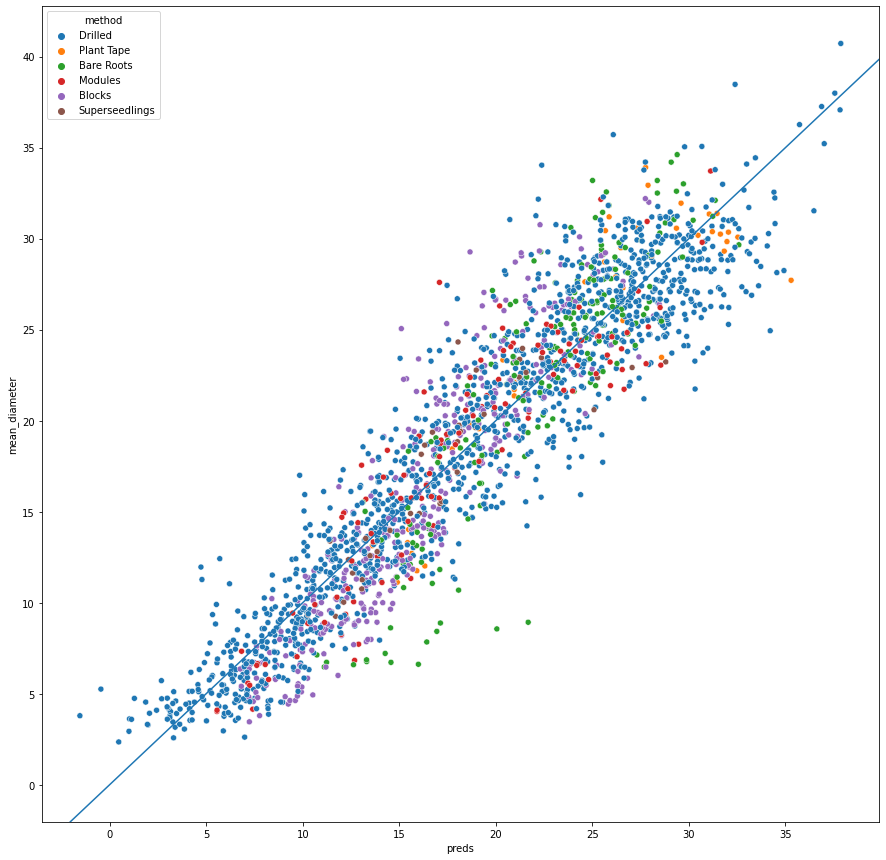

In [33]:
plt.figure(figsize=(15,15))
sns.scatterplot(x = 'preds', y = 'mean_diameter', data = summary_data_avg, hue = 'method')
plt.axline([0, 0], [1, 1])
plt.show()

In [34]:
coef_list = list(reg.coef_)
var_list = list(X_1)

reg_coef_df = pd.DataFrame({'variable': var_list, 'coef': coef_list}, columns=['variable', 'coef'])

reg_coef_df

,variable,coef
0,pp2m2,2.310666e-02
1,organic_matter,7.343028e-02
2,s_lin,4.789754e+00
3,protection_Fleece,2.496641e+00
4,protection_None,7.655807e-01
5,protection_Poly,4.624233e+00
6,growth_units,1.260606e-08
7,method_Blocks,-6.244714e+00
8,method_Drilled,-1.171465e+01
9,method_Modules,-4.809105e-01


In [35]:
def average_count(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    average_count = df['pp2m2'].mean()
    
    return average_count

average_count('Allans 071')

43.75

In [36]:
def max_sample_date(fieldzone):
    
    df = summary_data[summary_data['fieldzone']==fieldzone]
    max_sample_date = df['sample_date'].max()
    
    return max_sample_date

max_sample_date('Allans 071')

Timestamp('2020-01-13 00:00:00')

In [37]:
def max_mean_diameter_lin(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_mean_diameter = df['mean_diameter'].max()
    max_mean_diameter_lin = max_mean_diameter ** 0.625
    
    return max_mean_diameter_lin

max_mean_diameter_lin('Allans 071')

9.26293214352213

In [38]:
def max_std_dev_diameter_lin(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_std_dev_diameter = df['std_dev_diameter'].max()
    max_std_dev_diameter_lin = max_std_dev_diameter ** 0.625
    
    return max_std_dev_diameter_lin

max_std_dev_diameter_lin('Allans 071')

4.348294771174176

In [39]:
def max_solar(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_solar = df['solar_radiation'].max()
    
    return max_solar

max_solar('Allans 071')

790123

In [40]:
def max_heat(fieldzone):
    
    df = summary_data_avg[summary_data_avg['fieldzone']==fieldzone]
    max_heat = df['heat_units'].max()
    
    return max_heat

max_heat('Allans 071')

2143

In [41]:
zone_data['mean_pp2m2'] = 0.0
zone_data['max_sample_date'] = 0
zone_data['max_mean_diameter_lin'] = 0.0
zone_data['max_std_dev_diameter_lin'] = 0.0
zone_data['max_heat'] = 0.0
zone_data['max_solar'] = 0.0
zone_data['remaining_heat'] = 0.0
zone_data['remaining_solar'] = 0.0

for i in zone_data.index:
    
    clear_output(wait=True)
    
    fieldzone = zone_data.loc[i, 'fieldzone']
    zone_data.loc[i, 'mean_pp2m2'] = average_count(fieldzone)
    zone_data.loc[i, 'max_sample_date'] = max_sample_date(fieldzone)
    zone_data.loc[i, 'max_mean_diameter_lin'] = max_mean_diameter_lin(fieldzone)
    zone_data.loc[i, 'max_std_dev_diameter_lin'] = max_std_dev_diameter_lin(fieldzone)
    zone_data.loc[i, 'max_heat'] = max_heat(fieldzone)
    zone_data.loc[i, 'max_solar'] = max_solar(fieldzone)
    start = zone_data.loc[i, 'max_sample_date']
    finish = zone_data.loc[i, 'est_harvest_date']
    zone_data.loc[i, 'remaining_heat'] = cum_heat_units(start, finish, weather_data_avg)
    zone_data.loc[i, 'remaining_solar'] = cum_solar_radiation(start, finish, weather_data_avg)   
    
    print("Current Progress:", np.round(i/len(zone_data)*100,0),"%")

Current Progress: 100.0 %


In [42]:
zone_data = zone_data.dropna()
zone_data

,field,zone,planting_date,variety,method,inputs,protection,planting_rate,sand,silt,clay,organic_matter,est_harvest_date,fieldzone,mean_pp2m2,max_sample_date,max_mean_diameter_lin,max_std_dev_diameter_lin,max_heat,max_solar,remaining_heat,remaining_solar
0,Allans 07,1,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 071,43.750000,2020-01-13 00:00:00,9.262932,4.348295,2143.0,790123.0,0.000000,0.000000
1,Allans 07,2,2019-04-01,Krypton,Drilled,Conventional,Barley,249820,39,37,24,29.6,2019-12-15,Allans 072,42.750000,2020-01-13 00:00:00,9.434036,4.100674,2143.0,790123.0,0.000000,0.000000
2,Allans 07,3,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 073,44.500000,2020-01-13 00:00:00,8.156374,2.884318,2143.0,790123.0,0.000000,0.000000
3,Allans 07,4,2019-04-01,Longton,Drilled,Conventional,Barley,256524,39,37,24,29.6,2019-12-15,Allans 074,45.750000,2020-01-13 00:00:00,8.513126,3.367604,2143.0,790123.0,0.000000,0.000000
4,Allans 07,5,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,2019-12-15,Allans 075,44.333333,2020-01-20 00:00:00,8.227045,3.338805,2149.0,794356.0,0.000000,0.000000
5,Allans 07,6,2019-04-01,Batter,Drilled,Conventional,Barley,247048,39,37,24,29.6,2019-12-15,Allans 076,48.333333,2020-01-20 00:00:00,7.830488,3.319406,2149.0,794356.0,0.000000,0.000000
6,Allans 12,1,2020-05-02,Longton,Drilled,Conventional,Barley,258471,27,45,28,32.8,2021-04-14,Allans 121,39.428571,2021-04-05 00:00:00,7.580983,3.121852,2176.0,796318.0,32.790476,27498.000000
7,Allans 12,2,2020-05-02,Longton,Drilled,Conventional,Barley,258471,27,45,28,32.8,2021-04-14,Allans 122,41.714286,2021-04-05 00:00:00,7.812721,3.260468,2176.0,796318.0,32.790476,27498.000000
8,Allans 12,3,2020-05-02,Longton,Drilled,Conventional,Barley,258471,27,45,28,32.8,2021-04-14,Allans 123,43.714286,2021-04-05 00:00:00,7.900853,3.434215,2176.0,796318.0,32.790476,27498.000000
9,Allans 12,4,2020-05-02,Longton,Drilled,Conventional,Barley,258471,27,45,28,32.8,2021-04-14,Allans 124,39.571429,2021-04-05 00:00:00,7.591126,3.294638,2176.0,796318.0,32.790476,27498.000000


In [43]:
def filter_data(data, method, inputs, variety):
    
    filtered = data[data['variety'].str.contains(variety)]
    filtered = filtered[filtered['inputs'].str.contains(inputs)]
    filtered = filtered[filtered['method'].str.contains(method)]
    
    return filtered

In [44]:
def predict_weather(start, finish, variable):
    
    df = weather_data_avg.loc[(weather_data_avg['date'] > start) & (weather_data_avg['date'] < finish), [variable]]
    pred_hu = df[variable].sum()
    
    return pred_hu

start = datetime(year=2021, month=6, day=2, hour=13, minute=14, second=31)
finish = datetime(year=2022, month=6, day=2, hour=13, minute=14, second=31)

predict_weather(start, finish, 'rain')

536.6446428571428

In [45]:
zone_data['est_mean_diameter_gain'] = 0.0
zone_data['est_std_dev_diameter_gain'] = 0.0

for i in zone_data.index:
    method = zone_data.loc[i, 'method']
    inputs = zone_data.loc[i, 'inputs']
    variety = zone_data.loc[i, 'variety']
    protection = zone_data.loc[i, 'protection']

    df = filter_data(summary_data_avg, method, inputs, variety)
    X = df[['solar_radiation', 'heat_units', 'pp2m2', 'organic_matter', 'protection_Fleece', 'protection_None', 'protection_Poly']]
    y_dl = df['d_lin']
    y_sd = df['s_lin']

    reg_dl = LinearRegression().fit(X, y_dl)
    solar_radiation_dl_coef = reg_dl.coef_[0]
    heat_units_dl_coef = reg_dl.coef_[1]
    
    reg_sd = LinearRegression().fit(X, y_sd) 
    solar_radiation_sd_coef = reg_sd.coef_[0]
    heat_units_sd_coef = reg_sd.coef_[1]
    
    zone_data.loc[i, 'est_mean_diameter_gain'] = (solar_radiation_dl_coef*(zone_data.loc[i, 'remaining_solar'])) + (heat_units_dl_coef*(zone_data.loc[i, 'remaining_heat']))
    zone_data.loc[i, 'est_std_dev_diameter_gain'] = (solar_radiation_sd_coef*(zone_data.loc[i, 'remaining_solar'])) + (heat_units_sd_coef*(zone_data.loc[i, 'remaining_heat']))
    
    print(f'{i} - {reg_dl.score(X, y_dl):.3f} - {reg_sd.score(X, y_sd):.3f}')
    


0 - 0.897 - 0.805
1 - 0.897 - 0.805
2 - 0.856 - 0.761
3 - 0.856 - 0.761
4 - 0.961 - 0.765
5 - 0.961 - 0.765
6 - 0.856 - 0.761
7 - 0.856 - 0.761
8 - 0.856 - 0.761
9 - 0.856 - 0.761
10 - 0.956 - 0.892
11 - 0.961 - 0.765
12 - 0.961 - 0.765
13 - 0.887 - 0.791
14 - 0.887 - 0.791
15 - 0.956 - 0.892
16 - 0.956 - 0.892
17 - 0.956 - 0.892
18 - 0.956 - 0.892
19 - 0.956 - 0.892
20 - 0.956 - 0.892
21 - 0.956 - 0.892
22 - 0.887 - 0.791
23 - 0.887 - 0.791
26 - 0.897 - 0.805
27 - 0.897 - 0.805
30 - 0.897 - 0.805
31 - 0.897 - 0.805
32 - 0.897 - 0.805
33 - 0.897 - 0.805
34 - 0.897 - 0.805
35 - 0.897 - 0.805
36 - 0.897 - 0.805
37 - 0.887 - 0.791
38 - 0.887 - 0.791
39 - 0.970 - 0.791
40 - 0.970 - 0.791
41 - 0.970 - 0.791
42 - 0.970 - 0.791
43 - 0.960 - 0.892
44 - 0.960 - 0.892
45 - 0.960 - 0.892
46 - 0.960 - 0.892
47 - 0.970 - 0.791
48 - 0.970 - 0.791
49 - 0.970 - 0.791
50 - 0.970 - 0.791
51 - 0.954 - 0.802
52 - 0.954 - 0.802
53 - 0.954 - 0.802
54 - 0.954 - 0.802
55 - 0.942 - 0.850
56 - 0.942 - 0.850
57 

c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\tom\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



229 - 0.913 - 0.829
230 - 0.979 - 0.968
231 - 0.979 - 0.968
232 - 0.992 - 0.888
233 - 0.992 - 0.888
234 - 0.886 - 0.772
235 - 0.886 - 0.772
236 - 0.923 - 0.806
237 - 0.923 - 0.806
238 - 0.957 - 0.834
239 - 0.957 - 0.834
240 - 0.957 - 0.834
241 - 0.957 - 0.834
242 - 0.957 - 0.834
243 - 0.957 - 0.834
244 - 0.927 - 0.913
245 - 0.927 - 0.913
246 - 0.927 - 0.913
247 - 0.927 - 0.913
248 - 0.878 - 0.838
249 - 0.878 - 0.838
250 - 0.878 - 0.838
251 - 0.878 - 0.838
252 - 0.927 - 0.913
253 - 0.927 - 0.913
254 - 0.927 - 0.913
255 - 0.887 - 0.960
256 - 0.887 - 0.791
257 - 0.956 - 0.892
258 - 0.956 - 0.892
259 - 0.956 - 0.892
260 - 0.956 - 0.892
264 - 0.943 - 0.714
265 - 0.943 - 0.714
266 - 0.993 - 0.601
267 - 0.993 - 0.601
268 - 0.939 - 0.859
269 - 0.939 - 0.859
270 - 0.887 - 0.791
271 - 0.887 - 0.791
272 - 0.887 - 0.791
273 - 0.887 - 0.791
274 - 0.887 - 0.791
275 - 0.887 - 0.791
276 - 0.887 - 0.791
277 - 0.887 - 0.791
278 - 0.887 - 0.791
279 - 0.887 - 0.791
280 - 0.887 - 0.791
281 - 0.987 - 0.952

In [46]:
zone_data['est_mean_diameter'] = (zone_data['max_mean_diameter_lin'] + zone_data['est_mean_diameter_gain'])**1.6
zone_data['est_std_dev_diameter'] = (zone_data['max_std_dev_diameter_lin'] + zone_data['est_std_dev_diameter_gain'])**1.6
zone_data['field_variety'] = zone_data['field'] + " - " + zone_data['variety']
zone_data.to_excel(r'F:\Farm Data\Growth Model\generated_zone_data.xlsx', index = False, header = True)

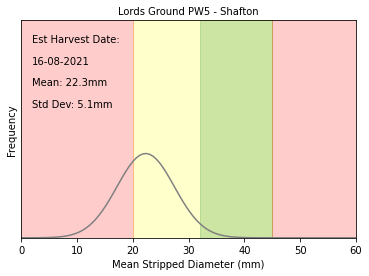

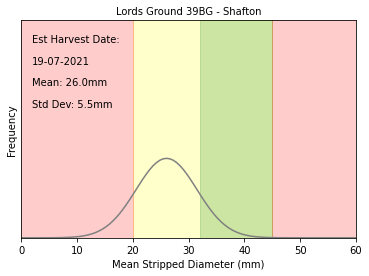

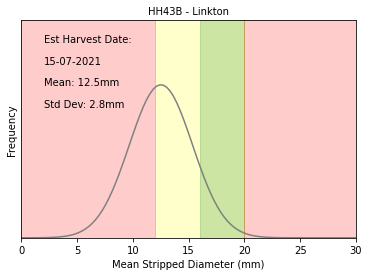

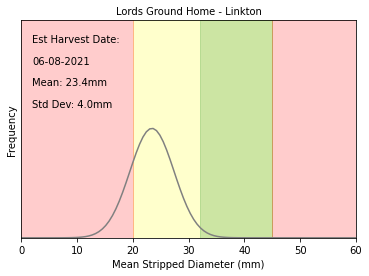

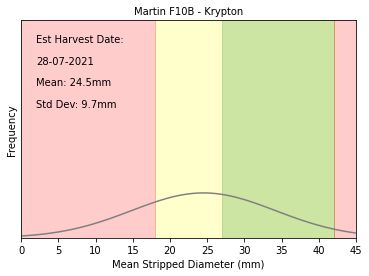

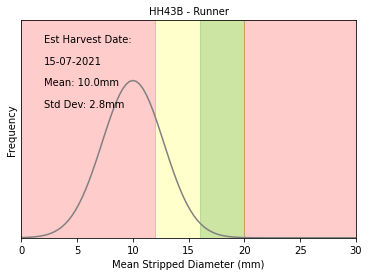

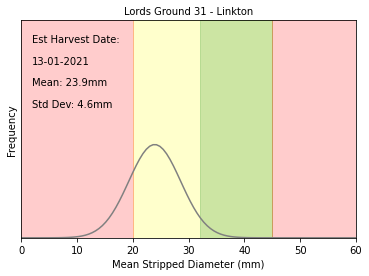

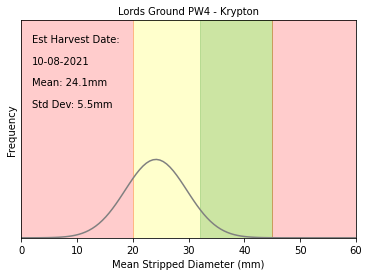

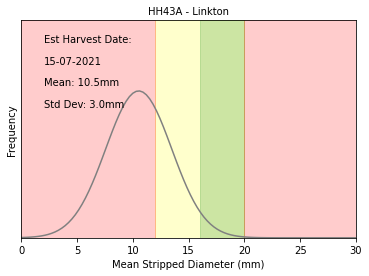

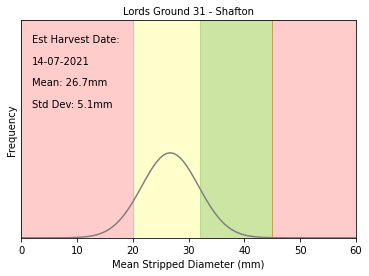

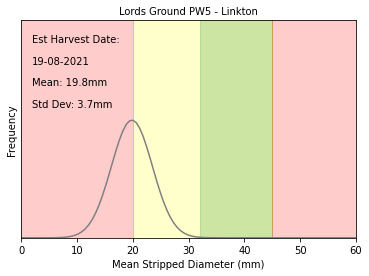

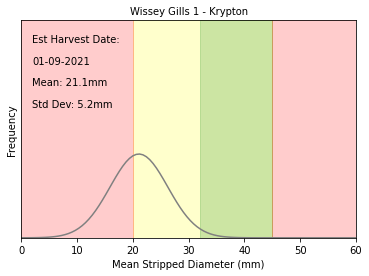

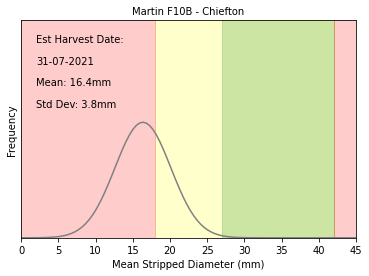

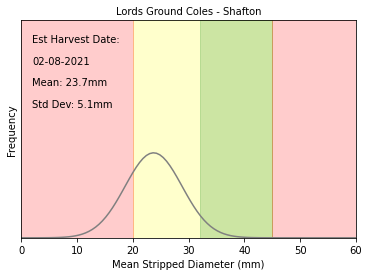

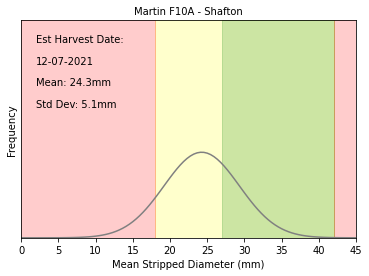

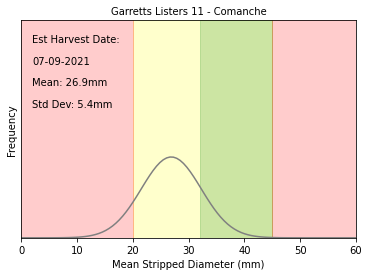

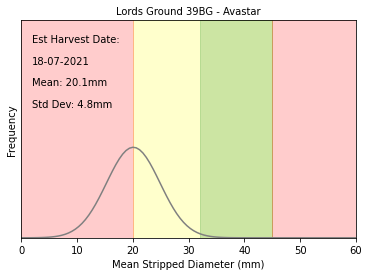

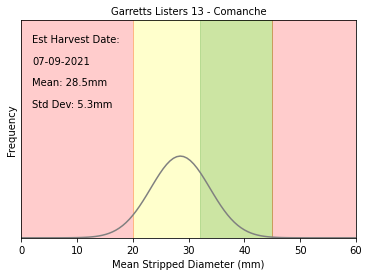

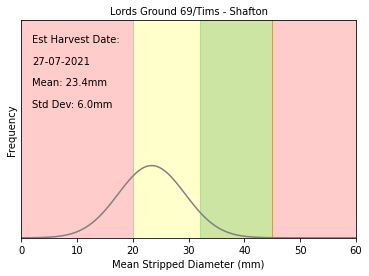

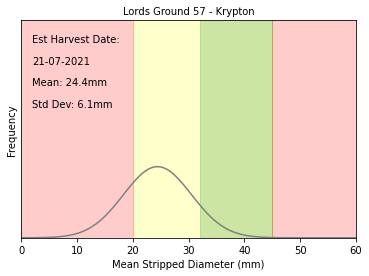

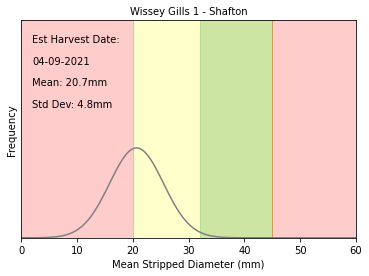

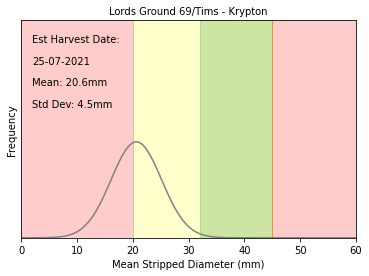

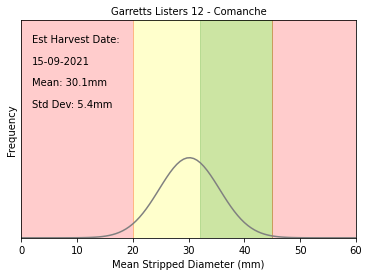

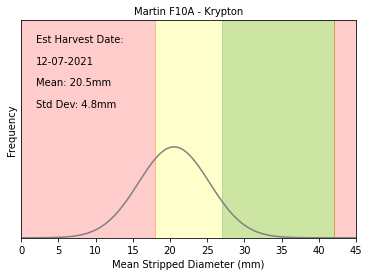

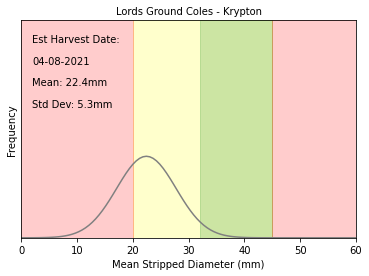

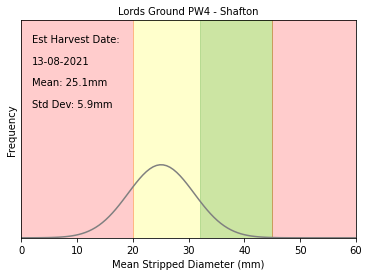

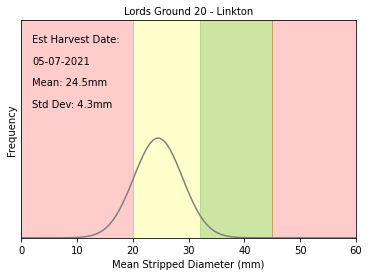

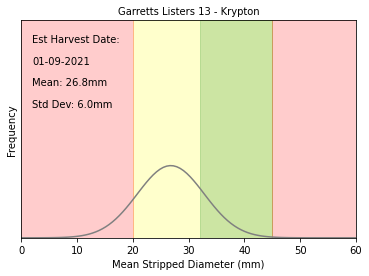

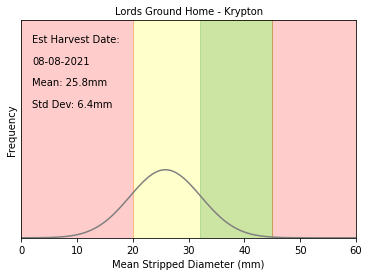

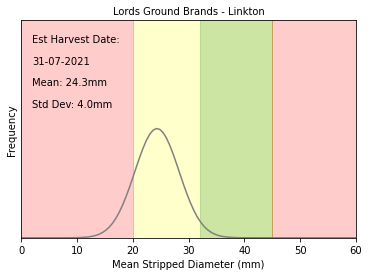

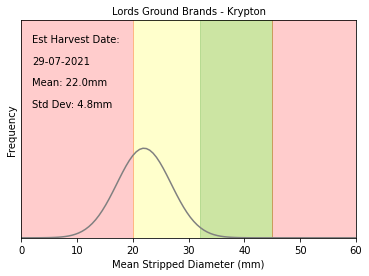

In [51]:
season = datetime(2021, 1, 1)
filt_zone_data = zone_data.loc[(zone_data['planting_date'] > season)]
field_variety_list = list(filt_zone_data['field_variety'])
field_variety_list = set(field_variety_list)
field_variety_list

for fv in field_variety_list:
    df = filt_zone_data.loc[(filt_zone_data['field_variety'] == fv)]
    df = df.reset_index(drop=True)
    inputs = mode(df['inputs'])
    
    if inputs == 'Baby':
        x_min = 0.0
        x_max = 30.0
        up_spec = 20
        low_spec = 12
        low_opt = 16
        
    elif inputs == 'Organic':
        x_min = 0.0
        x_max = 45.0
        up_spec = 42
        low_spec = 18
        low_opt = 27
        
    elif inputs == 'Conventional':
        x_min = 0.0
        x_max = 60.0
        up_spec = 45
        low_spec = 20
        low_opt = 32
        
    mean = df['est_mean_diameter'].mean()
    std = df['est_std_dev_diameter'].mean()

    x = np.linspace(x_min, x_max, 100)
    y = scipy.stats.norm.pdf(x,mean,std)
    c = 'grey'
    plt.plot(x,y, color=c)
    plt.grid()
    plt.xlim(x_min,x_max)
    plt.ylim(0,0.20)
    
    d = df.loc[0, 'est_harvest_date']
    d = d.date().strftime('%d-%m-%Y')
    
    plt.text(x=2, y=0.18, s='Est Harvest Date:')
    plt.text(x=2, y=0.16, s=d)
    plt.text(x=2, y=0.14, s=f'Mean: {mean:.1f}mm')
    plt.text(x=2, y=0.12, s=f'Std Dev: {std:.1f}mm')
    plt.grid(False)
    plt.axvspan(low_spec, up_spec, color='yellow', alpha=0.2)
    plt.axvspan(low_opt, up_spec, color='green', alpha=0.2)
    plt.axvspan(0, low_spec, color='red', alpha=0.2)
    plt.axvspan(up_spec, x_max, color='red', alpha=0.2)
    plt.title(f'{fv}',fontsize=10)
    
    new_fv = fv.replace('/', '-')

    plt.xlabel('Mean Stripped Diameter (mm)')
    plt.tick_params(left = False, labelleft = False)
    plt.ylabel('Frequency')

    plt.savefig(f"{new_fv} Population Distribution.png",dpi=600)
    plt.show()
    
